In [44]:
# Import pandas library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp
from urllib.request import urlretrieve
  

In [27]:
# initialize list of lists 
data = [[2,3,1], [2.1,2,1], 
        [4.5,6,1], [4,3.5,-1],
        [3.5,1,-1],[5,7,1],
        [5,3,-1],[6,5.5,1],[8,6,-1],[8,2,-1] ] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['x1','x2','y']) 
  
# print dataframe. 
df 

,x1,x2,y
0,2.0,3.0,1
1,2.1,2.0,1
2,4.5,6.0,1
3,4.0,3.5,-1
4,3.5,1.0,-1
5,5.0,7.0,1
6,5.0,3.0,-1
7,6.0,5.5,1
8,8.0,6.0,-1
9,8.0,2.0,-1


In [28]:
positives = df[df['y'] >= 0]
negatives = df[df['y'] < 0]

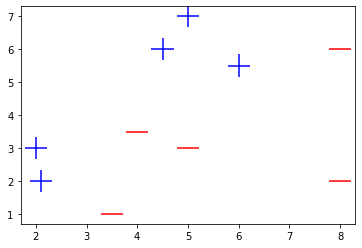

In [29]:
plt.scatter(positives['x1'], positives['x2'], marker='+', s=500*abs(positives['y']), c='blue')
plt.scatter(negatives['x1'], negatives['x2'], marker='_', s=500*abs(negatives['y']), c='red')
plt.show()

In [30]:
# Initially assign same weights to each record in dataset

df['probR1'] = 1/(df.shape[0])

In [31]:
df

,x1,x2,y,probR1
0,2.0,3.0,1,0.1
1,2.1,2.0,1,0.1
2,4.5,6.0,1,0.1
3,4.0,3.5,-1,0.1
4,3.5,1.0,-1,0.1
5,5.0,7.0,1,0.1
6,5.0,3.0,-1,0.1
7,6.0,5.5,1,0.1
8,8.0,6.0,-1,0.1
9,8.0,2.0,-1,0.1


In [32]:
random.seed(10)
df1 = df.sample(len(df), replace = True, weights = df['probR1'])
df1

,x1,x2,y,probR1
4,3.5,1.0,-1,0.1
4,3.5,1.0,-1,0.1
8,8.0,6.0,-1,0.1
4,3.5,1.0,-1,0.1
2,4.5,6.0,1,0.1
0,2.0,3.0,1,0.1
9,8.0,2.0,-1,0.1
1,2.1,2.0,1,0.1
3,4.0,3.5,-1,0.1
2,4.5,6.0,1,0.1


In [89]:
#X_train and Y_train split

X_train = df1.iloc[0:len(df1),0:2]
y_train = df1.iloc[0:len(df1),2]

In [90]:
#fitting the DT model with depth one
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

## IRIS dataset example--------------------------

In [80]:
iris = pd.read_csv("iris.csv")
#iris = iris.drop('Unnamed: 0', axis=1)
iris.head()

#iris['variety'].unique()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [81]:

#considering only two classes
example = iris[(iris['variety'] == 'Versicolor') | (iris['variety'] == 'Virginica')]
example
#example['variety'].unique()

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [82]:
#replacing the two classes with +1 and -1
example['Label'] = example['variety'].replace(to_replace = ['Versicolor','Virginica'], value=[1,-1])

<ipython-input-82-95aa5a0a2548>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['Label'] = example['variety'].replace(to_replace = ['Versicolor','Virginica'], value=[1,-1])


In [83]:
example = example.drop('variety', axis = 1)

In [84]:
#Initially assign same weights to each records in the dataset
example['probR1'] = 1/(example.shape[0])

example.head()

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1
50,7.0,3.2,4.7,1.4,1,0.01
51,6.4,3.2,4.5,1.5,1,0.01
52,6.9,3.1,4.9,1.5,1,0.01
53,5.5,2.3,4.0,1.3,1,0.01
54,6.5,2.8,4.6,1.5,1,0.01


In [85]:
#simple random sample with replacement
random.seed(10)
example1 = example.sample(len(example), replace = True, weights = example['probR1'])
example1

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1
51,6.4,3.2,4.5,1.5,1,0.01
99,5.7,2.8,4.1,1.3,1,0.01
65,6.7,3.1,4.4,1.4,1,0.01
88,5.6,3.0,4.1,1.3,1,0.01
145,6.7,3.0,5.2,2.3,-1,0.01
...,...,...,...,...,...,...
73,6.1,2.8,4.7,1.2,1,0.01
124,6.7,3.3,5.7,2.1,-1,0.01
50,7.0,3.2,4.7,1.4,1,0.01
136,6.3,3.4,5.6,2.4,-1,0.01


In [91]:
#X_train and Y_train split
X_train = example1.iloc[0:len(iris),0:4]     # sepal.length	sepal.width	petal.length	petal.width
y_train = example1.iloc[0:len(iris),4]       # Label

In [92]:
#fitting the DT model with depth one
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

[Text(167.4, 163.07999999999998, 'X[3] <= 1.7\ngini = 0.476\nsamples = 100\nvalue = [39, 61]'),
 Text(83.7, 54.360000000000014, 'gini = 0.062\nsamples = 62\nvalue = [2, 60]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.051\nsamples = 38\nvalue = [37, 1]')]

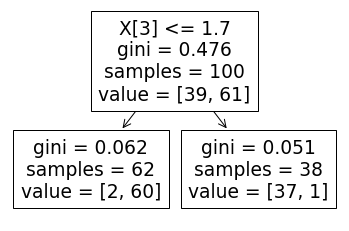

In [93]:
#plotting tree for round 1 boosting
tree.plot_tree(clf)

In [94]:
#prediction
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [95]:
#adding a column pred1 after the first round of boosting
example['pred1'] = y_pred
example

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1
50,7.0,3.2,4.7,1.4,1,0.01,1
51,6.4,3.2,4.5,1.5,1,0.01,1
52,6.9,3.1,4.9,1.5,1,0.01,1
53,5.5,2.3,4.0,1.3,1,0.01,1
54,6.5,2.8,4.6,1.5,1,0.01,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1
146,6.3,2.5,5.0,1.9,-1,0.01,-1
147,6.5,3.0,5.2,2.0,-1,0.01,-1
148,6.2,3.4,5.4,2.3,-1,0.01,-1


In [96]:
#misclassified = 0 if the label and prediction are same
example.loc[example.Label != example.pred1, 'misclassified'] = 1
example.loc[example.Label == example.pred1, 'misclassified'] = 0

In [98]:
#error calculation
e1 = sum(example['misclassified'] * example['probR1'])
e1

0.060000000000000005

In [99]:
#calculation of alpha (performance)
alpha1 = 0.5*log((1-e1)/e1)

In [100]:
#update weight
new_weight = example['probR1']*np.exp(-1*alpha1*example['Label']*example['pred1'])

In [101]:
#normalized weight
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [102]:
example['prob2'] = round(normalized_weight,4)
example

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,prob2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0053
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0053
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0053
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0053


In [103]:
#round 2
random.seed(20)
example2 = example.sample(len(example), replace = True, weights = example['prob2'])
example2 = example2.iloc[:,0:5]
X_train = example2.iloc[0:len(iris),0:4]
y_train = example2.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
#adding a column pred2 after the second round of boosting
example['pred2'] = y_pred

[Text(167.4, 163.07999999999998, 'X[2] <= 5.05\ngini = 0.49\nsamples = 100\nvalue = [57, 43]'),
 Text(83.7, 54.360000000000014, 'gini = 0.245\nsamples = 49\nvalue = [7, 42]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.038\nsamples = 51\nvalue = [50, 1]')]

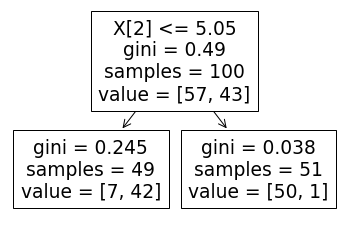

In [104]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [105]:
example

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,prob2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0053,-1
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0053,1
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0053,-1
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0053,-1


In [106]:
#adding a field misclassified2
example.loc[example.Label != example.pred2, 'misclassified2'] = 1
example.loc[example.Label == example.pred2, 'misclassified2'] = 0

In [107]:
# calculation of error
e2 = sum(example['misclassified2'] * example['prob2'])
e2

0.131

In [108]:
#calculation of alpha
alpha2 = 0.5*log((1-e2)/e2)
alpha2

0.9460729010321202

In [109]:
#update weight
new_weight = example['prob2']*np.exp(-1*alpha2*example['Label']*example['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [110]:
example['prob3'] = round(normalized_weight,4)
example

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.0031
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0031
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0031
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0031
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0031
...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0053,-1,0.0,0.0031
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0053,1,1.0,0.0203
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0053,-1,0.0,0.0031
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0053,-1,0.0,0.0031


In [111]:
#round 3
random.seed(30)
example3 = example.sample(len(example), replace = True, weights = example['prob3'])
example3 = example3.iloc[:,0:5]
X_train = example3.iloc[0:len(iris),0:4]
y_train = example3.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred3 after the third round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred3'] = y_pred

[Text(167.4, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.394\nsamples = 100\nvalue = [73, 27]'),
 Text(83.7, 54.360000000000014, 'gini = 0.375\nsamples = 24\nvalue = [6, 18]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.209\nsamples = 76\nvalue = [67, 9]')]

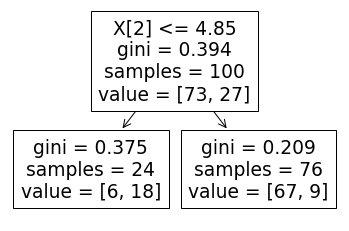

In [112]:
#plotting tree for round 3 boosting
tree.plot_tree(clf)

In [113]:
#adding a field misclassified3
example.loc[example.Label != example.pred3, 'misclassified3'] = 1
example.loc[example.Label == example.pred3, 'misclassified3'] = 0

In [114]:
#weighted error calculation
e3 = sum(example['misclassified3'] * example['prob3']) #/len(example)
e3

0.1354

In [115]:
#calculation of performance(alpha)
alpha3 = 0.5*log((1-e3)/e3)

In [116]:
#update weight
new_weight = example['prob3']*np.exp(-1*alpha3*example['Label']*example['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [117]:
example['prob4'] = round(normalized_weight,4)
example

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.0031,1,0.0,0.0018
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0031,1,0.0,0.0018
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0031,-1,1.0,0.0114
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0031,1,0.0,0.0018
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0031,1,0.0,0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0053,-1,0.0,0.0031,-1,0.0,0.0018
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0053,1,1.0,0.0203,-1,0.0,0.0117
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0053,-1,0.0,0.0031,-1,0.0,0.0018
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0053,-1,0.0,0.0031,-1,0.0,0.0018


In [118]:

#Round 4
random.seed(40)
example4 = example.sample(len(example), replace = True, weights = example['prob4'])
example4 = example4.iloc[:,0:5]
X_train = example4.iloc[0:len(iris),0:4]
y_train = example4.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred4 after the fourth round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred4'] = y_pred

[Text(167.4, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.476\nsamples = 100\nvalue = [61, 39]'),
 Text(83.7, 54.360000000000014, 'gini = 0.493\nsamples = 66\nvalue = [29, 37]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.111\nsamples = 34\nvalue = [32, 2]')]

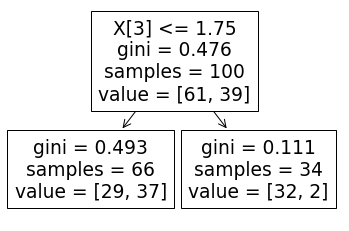

In [119]:
#plotting tree for round 4 boosting
tree.plot_tree(clf)

In [120]:
#adding a field misclassified4
example.loc[example.Label != example.pred4, 'misclassified4'] = 1
example.loc[example.Label == example.pred4, 'misclassified4'] = 0

In [121]:
#error calculation
e4 = sum(example['misclassified4'] * example['prob4']) 
e4

0.36920000000000003

In [122]:
# calculation of performance (alpha)
alpha4 = 0.5*log((1-e4)/e4)

In [123]:
#printing the alpha value which is used in each round of boosting
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

1.3757676565209744
0.9460729010321202
0.9270168058776784
0.2678251762300931


In [124]:
#final prediction
t = alpha1 * example['pred1'] + alpha2 * example['pred2'] + alpha3 * example['pred3'] + alpha4 * example['pred4']

In [125]:
#sign of the final prediction
np.sign(list(t))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [127]:
example['final_pred'] = np.sign(list(t))
example

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4,final_pred
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.0031,1,0.0,0.0018,1,0.0,1.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0031,1,0.0,0.0018,1,0.0,1.0
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0031,-1,1.0,0.0114,1,0.0,1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0031,1,0.0,0.0018,1,0.0,1.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0031,1,0.0,0.0018,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0053,-1,0.0,0.0031,-1,0.0,0.0018,-1,0.0,-1.0
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0053,1,1.0,0.0203,-1,0.0,0.0117,-1,0.0,-1.0
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0053,-1,0.0,0.0031,-1,0.0,0.0018,-1,0.0,-1.0
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0053,-1,0.0,0.0031,-1,0.0,0.0018,-1,0.0,-1.0


In [128]:

#Confusion matrix
c=confusion_matrix(example['Label'], example['final_pred'])
c

array([[46,  4],
       [ 2, 48]], dtype=int64)

In [129]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

94.0

## Fitting the model using the adaboost classifier library

In [130]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
iris = pd.read_csv("iris.csv")  
#iris = iris.drop('Unnamed: 0', axis=1)
iris = iris[(iris['variety'] == 'Versicolor') | (iris['variety'] == 'Virginica')]

In [133]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [134]:
#X_train and Y_train split
X_train = iris.iloc[0:len(iris),0:4]
y_train = iris.iloc[0:len(iris),4]

In [135]:
clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [141]:
clf.predict([[5.5, 2.5, 4.0, 1.3]])        # trying to predict a new instance which is to be added to dataset

array(['Versicolor'], dtype=object)

In [142]:
clf.score(X_train, y_train)

0.96